# Regression Models

# Import Libraries

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Data Loading & Inspecting the Dataset

In [50]:
df = pd.read_csv("California_Houses.csv")

In [51]:
print(df.shape)

(20640, 14)


In [52]:
print(df.head())

   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.5170

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [54]:
print(df.describe())

       Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000  

In [55]:
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


In [56]:
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


# Data Splitting (Training , Validation , Test)

In [58]:
X = df.drop("Median_House_Value", axis=1).values
y = df["Median_House_Value"].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

Train size: 14448
Validation size: 3096
Test size: 3096


## Feature Scalling

In [60]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train_scaled = (X_train - X_mean) / X_std
X_val_scaled = (X_val - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

In [61]:
X_train.shape , X_val.shape , X_test.shape 

((14448, 13), (3096, 13), (3096, 13))

# Part 1: Regression Models From Scratch

### Implementing using Normal Equation

In [172]:
#  Merge column 1 into X to
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val_b = np.c_[np.ones ((X_val.shape[0], 1)), X_val]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Calculate weights (w)
w = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# prediction
y_val_pred = X_val_b.dot(w)
y_test_pred = X_test_b.dot(w)

print(y_val_pred)
print(y_test_pred)

[117112.59499985 332653.97680117 406311.5956708  ... 254464.49377846
 142097.9688237  205083.4967788 ]
[111105.47632701 113660.90241879 237586.1200905  ...  89108.02157612
 149375.24135161 248930.5182664 ]


### Mean Square Error (MSE)

In [66]:
def mean_squared_error_manual(y_true, y_pred):
    errors = y_true - y_pred                 
    squared_errors = errors ** 2             
    mse = np.mean(squared_errors)      
    return mse

### Mean Absolute Error (MAE)

In [68]:
def mean_absolute_error_manual(y_true, y_pred):
    errors = np.abs(y_true - y_pred)         
    mae = np.mean(errors)               
    return mae

### Implemetation using Gradient Descent

In [70]:
def gradient_descent(X, y, learning_rate, iterations=10000):
    n = len(y)
    X_b = np.c_[np.ones((n, 1)), X]
    w_gd = np.random.randn(X_b.shape[1], 1)
    y = np.array(y).reshape(-1, 1)
    losses = []

    for iteration in range(iterations):
        gradients = 2/n * X_b.T.dot(X_b.dot(w) - y)
        w -= learning_rate * gradients
        error = X_b.dot(w_gd) - y
        losses.append(np.mean(error**2))
        
    return w, losses

In [137]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
results = []

for i in range(iterations):
        error = X_b.dot(w) - y
        gradients = 2/n * X_b.T.dot(error)
        w -= learning_rate * gradients
        loss = np.mean(error**2)
        losses.append(loss)

    return w, losses


for lr in learning_rates:
    w_gd = gradient_descent(X_train_scaled, y_train, learning_rate=lr, iterations=20000)  
    y_val_pred_gd = np.c_[np.ones((X_val.shape[0], 1)), X_val_scaled].dot(w_gd)
    
    mse = mean_squared_error(y_val, y_val_pred_gd)
    mae = mean_absolute_error(y_val, y_val_pred_gd)
    
    results.append((lr, mse, mae))
    print(f"learning_rate={lr} | MSE={mse:.2f} | MAE={mae:.2f}")

# 🔹 Step 2: Pick best learning rate
best_result_gd = min(results, key=lambda x: x[1])
best_lr = best_result_gd[0]
print(" Best learning rate:", best_lr)


# 🔹 Step 3: Retrain using the best learning rate on training data
w_best = gradient_descent(X_train_scaled, y_train, learning_rate=best_lr, iterations=20000)


# 🔹 Step 4: Evaluate on both validation & test sets
y_val_pred_best = np.c_[np.ones((X_val.shape[0], 1)), X_val_scaled].dot(w_best).ravel()
y_test_pred_best = np.c_[np.ones((X_test.shape[0], 1)), X_test_scaled].dot(w_best).ravel()


mse_val = mean_squared_error(y_val, y_val_pred_best)
mae_val = mean_absolute_error(y_val, y_val_pred_best)
print(f"\nValidation -> MSE: {mse_val:.2f} | MAE: {mae_val:.2f}")

learning_rate=1e-05 | MSE=27441787555.92 | MAE=139009.50
learning_rate=0.0001 | MSE=5311939431.16 | MAE=52863.87
learning_rate=0.001 | MSE=4964710261.92 | MAE=51339.08
learning_rate=0.01 | MSE=4912851134.11 | MAE=50861.18
learning_rate=0.1 | MSE=4907211931.37 | MAE=50790.07
 Best learning rate: 0.1

Validation -> MSE: 4907211931.36 | MAE: 50790.07


learning_rate=0.0001 | Validation MSE=11953419119.23
learning_rate=0.0001438449888287663 | Validation MSE=8144447205.04
learning_rate=0.00020691380811147902 | Validation MSE=6189990265.28
learning_rate=0.00029763514416313193 | Validation MSE=5489432078.57
learning_rate=0.00042813323987193956 | Validation MSE=5288502621.23
learning_rate=0.0006158482110660267 | Validation MSE=5195039815.13
learning_rate=0.0008858667904100823 | Validation MSE=5121118720.45
learning_rate=0.0012742749857031334 | Validation MSE=5062094376.38
learning_rate=0.0018329807108324356 | Validation MSE=5018758153.29
learning_rate=0.0026366508987303583 | Validation MSE=4988434346.77
learning_rate=0.00379269019073225 | Validation MSE=4967252630.24
learning_rate=0.005455594781168515 | Validation MSE=4951884970.01
learning_rate=0.007847599703514606 | Validation MSE=4940298464.61
learning_rate=0.011288378916846883 | Validation MSE=4931654832.01
learning_rate=0.01623776739188721 | Validation MSE=4925110622.36
learning_rate

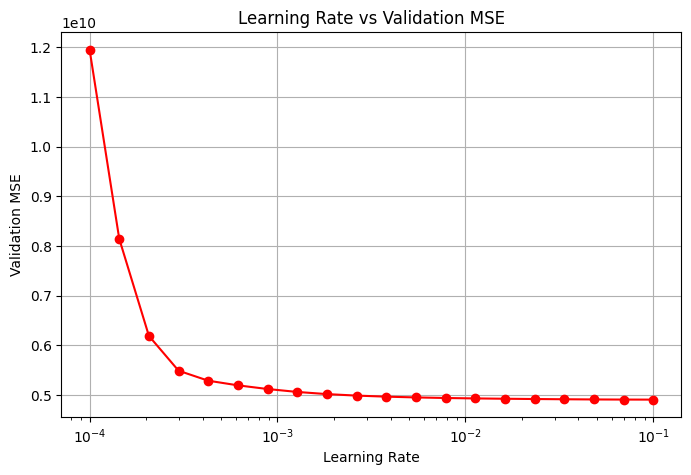

In [201]:
# Try different learning rates 
learning_rates = np.logspace(-4, -1, 20) 
validation_mse = []
all_loss_histories = []

for lr in learning_rates:
    w_gd, loss_history = gradient_descent(X_train_scaled, y_train, learning_rate=lr, iterations=5000)
    y_val_pred = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled].dot(w_gd)
    
    mse = mean_squared_error(y_val, y_val_pred)
    validation_mse.append(mse)
    all_loss_histories.append(loss_history)
    
    print(f"learning_rate={lr} | Validation MSE={mse:.2f}")

# Pick best learning rate
best_idx = np.argmin(validation_mse)
best_lr = learning_rates[best_idx]
print("\nBest learning rate:", best_lr)

# Plot Learning Rate vs Validation MSE 
plt.figure(figsize=(8,5))
plt.plot(learning_rates, validation_mse, marker='o', color='red')
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Validation MSE")
plt.title("Learning Rate vs Validation MSE")
plt.grid(True)
plt.show()

### L2 Regularization (Ridge Regression)

In [73]:
def ridge_regression(X, y, lampda=0.0001):
    n = len(y)
    X_b = np.c_[np.ones((n, 1)), X]
    I = np.eye(X_b.shape[1])
    I[0,0] = 0  # Do not penalize bias operator.
    w_l2 = np.linalg.inv(X_b.T.dot(X_b) + lampda  *I).dot(X_b.T).dot(y)
    return w_l2
    
w_l2 = ridge_regression(X_train_scaled, y_train)
y_val_pred_l2 = np.c_[np.ones((X_val.shape[0], 1)), X_val_scaled].dot(w_l2)

print(y_val_pred_l2)

[117112.61940237 332653.97672069 406311.58629568 ... 254464.46532736
 142097.98861339 205083.51061669]


Best lambda: 0.0001


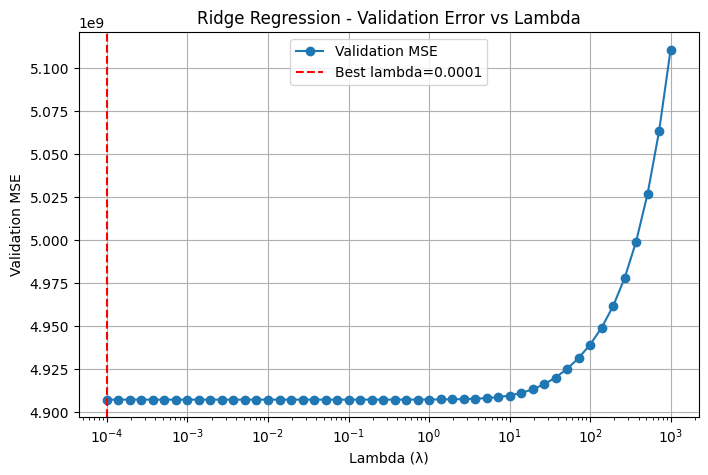

Validation MSE for best lambda: 4907212001.132565
Validation MAE for best lambda: 50790.06063210825


In [203]:
lambdas = np.logspace(-4, 3, 50)
results = []

# Compute MSE & MAE for each lambda
for l in lambdas:
    w_l2 = ridge_regression(X_train_scaled, y_train, lampda=l)
    y_val_pred_l2 = np.c_[np.ones((X_val.shape[0], 1)), X_val_scaled] @ w_l2
    
    mse = mean_squared_error(y_val, y_val_pred_l2)
    mae = mean_absolute_error(y_val, y_val_pred_l2)
    
    results.append((l, mse, mae))

# Convert results to arrays
lambdas_array = np.array([r[0] for r in results])
mse_array = np.array([r[1] for r in results])
mae_array = np.array([r[2] for r in results])

# Find best lambda
best_result = min(results, key=lambda x: x[1])
best_lambda = best_result[0]
print("Best lambda:", best_lambda)

# Re-train final model on best lambda
w_l2_best = ridge_regression(X_train_scaled, y_train, lampda=best_lambda)
y_test_pred_l2 = np.c_[np.ones((X_test.shape[0], 1)), X_test_scaled].dot(w_l2_best)

# Plot MSE vs Lambda 
plt.figure(figsize=(8,5))
plt.plot(lambdas_array, mse_array, marker='o', label='Validation MSE')
plt.axvline(best_lambda, color='r', linestyle='--', label=f'Best lambda={best_lambda}')
plt.xscale('log')
plt.xlabel("Lambda (λ)")
plt.ylabel("Validation MSE")
plt.title("Ridge Regression - Validation Error vs Lambda")
plt.grid(True)
plt.legend()
plt.show()

# ---------------- Print final metrics ----------------
print("Validation MSE for best lambda:", min(mse_array))
print("Validation MAE for best lambda:", mae_array[np.argmin(mse_array)])


In [75]:
print(np.mean(y_train), np.std(y_train))
print(np.mean(y_val_pred_l2), np.std(y_val_pred_l2))

206923.9608942414 115745.23650984169
205385.48032851474 91965.20108301938


# Part 2: Regression Models using Scikit-Learn

## Linear Regression

In [78]:
#Linear Regression

#Training the Model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Predict on validation data
y_pred = regressor.predict(X_val_scaled)


# Evaluate using validation set
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

#Fianl Evaluation with the testing Set
y_pred_test = regressor.predict(X_test_scaled)

mse_linear = mean_squared_error(y_test,y_pred_test)
mae_linear = mean_absolute_error(y_test,y_pred_test)

print("Final Test Results:")
print("MSE:", mse_linear)
print("MAE:", mae_linear)

Final Test Results:
MSE: 4400953150.613741
MAE: 48782.03108085671


## Model 2: Lasso Regression (L1)

In [80]:
# L1 Regularization (Lasso Regression)

alphas = [0.001, 0.005, 0.01, 0.1, 1, 10]
lasso_results = []

for a in alphas:
    model = Lasso(alpha=a, max_iter=200000, tol=0.01) 
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    lasso_results.append((a, mse, mae))

# Pick best alpha
best_result = min(lasso_results, key=lambda x: x[1])
best_alpha = best_result[0]
print("\nBest alpha:", best_alpha)

# Train final model on training + validation
final_model = Lasso(alpha=best_alpha, max_iter=200000, tol=0.01)
final_model.fit(np.concatenate((X_train_scaled, X_val_scaled)),
                np.concatenate((y_train, y_val)))
mse_lasso = mean_squared_error(y_test, y_pred_test)
mae_lasso = mean_absolute_error(y_test, y_pred_test)
# Test evaluation
y_pred_test = final_model.predict(X_test_scaled)
print("\nFinal Test Results:")
print("MSE:", mse_lasso )
print("MAE:", mae_lasso)



Best alpha: 0.001

Final Test Results:
MSE: 4400953150.613741
MAE: 48782.03108085671


## Model 3: Ridge Regression (L2)

In [82]:
#L2 Regularization (Ridge Regression)
alphas = [0.001, 0.005, 0.01, 0.1, 1, 10]
ridge_results = []

for a in alphas:
    model = Ridge(alpha=a, max_iter=200000, tol=0.01) 
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    ridge_results.append((a, mse, mae))

# Pick best alpha
best_result = min(ridge_results, key=lambda x: x[1])
best_alpha = best_result[0]
print("\nBest alpha:", best_alpha)

# Train final model on training + validation
final_model = Ridge(alpha=best_alpha, max_iter=200000, tol=0.01)
final_model.fit(np.concatenate((X_train_scaled, X_val_scaled)),
                np.concatenate((y_train, y_val)))
mse_ridge =  mean_squared_error(y_test, y_pred_test)
mae_ridge =  mean_absolute_error(y_test, y_pred_test)
# Test evaluation
y_pred_test = final_model.predict(X_test_scaled)
print("\nFinal Test Results:")
print("MSE:", mse_ridge)
print("MAE:", mae_ridge)


Best alpha: 0.001

Final Test Results:
MSE: 4400899527.616999
MAE: 48842.22539295722


## Final Results

In [138]:
#Model from Scratch Results
mse_value = mean_squared_error_manual(y_test, y_test_pred)
mae_value = mean_absolute_error_manual(y_test, y_test_pred)

mse_value_gd = mean_squared_error_manual(y_test, y_test_pred_best)
mae_value_gd = mean_absolute_error_manual(y_test, y_test_pred_best)

mse_value_l2 = mean_squared_error_manual(y_test, y_test_pred_l2)
mae_value_l2 = mean_absolute_error_manual(y_test, y_test_pred_l2)
print("Model from Scratch Results\n")
print("Linear Test Results:")
print(f"MSE: {mse_value}")
print(f"MAE: {mae_value}")
print("\n")
print("Linear Test results optimized with Gradient Descent:")
print(f"MSE_gd: {mse_value_gd}")
print(f"MAE_gd: {mae_value_gd}")
print("\n")
print("Ridge Test Results:")
print(f"MSE_l2: {mse_value_l2}")
print(f"MAE_l2: {mae_value_l2}")

#Skitlearn Model Results
print("\n")
print("Skitlearn Model Results \n")
print("Linear Test Results:")
print("MSE:", mse_linear)
print("MAE:", mae_linear)
print("\n")
print("Lasso Test Results:")
print("MSE:", mse_lasso )
print("MAE:", mae_lasso)
print("\n")
print("Ridge Test Results:")
print("MSE:", mse_ridge)
print("MAE:", mae_ridge)

Model from Scratch Results

Linear Test Results:
MSE: 4400953150.63138
MAE: 48782.03108327907


Linear Test results optimized with Gradient Descent:
MSE_gd: 4400951605.933406
MAE_gd: 48782.0367379728


Ridge Test Results:
MSE_l2: 4400952696.86491
MAE_l2: 48782.03331235344


Skitlearn Model Results 

Linear Test Results:
MSE: 4400953150.613741
MAE: 48782.03108085671


Lasso Test Results:
MSE: 4400953150.613741
MAE: 48782.03108085671


Ridge Test Results:
MSE: 4400899527.616999
MAE: 48842.22539295722
